<table>
    <tr> <td valign="center"> <img src="LogoSTIMULATE.png" width=450pt> </td>
        <td valign="center" width="80%"> <b>Workshop on Mathematical Modeling and Numerical Analysis for Exascale, April 8-18, 2019</b></td>
        <td valign="center"> <img src="LogoHU.png" width=150pt> </td>
    </tr>
</table>

# Programming 1

## Modeling, analysis and numerical simulation of Hamiltonian systems

We consider <font color='blue'>Hamiltonian systems</font>:
\begin{align}
  p'(t)&=-H_q(p(t),q(t)) \\
  q'(t)&=H_p(p(t),q(t)) 
\end{align}

<font color="green">Example:</font> $H(p,q) = \frac{1}{2}(p_1^2+p_2^2) - \frac{1}{\sqrt{q_1^2+q_2^2}}$ for <b>move of a satellite</b> 
\begin{align}
  p'_1 &= q_1(q_1^2+q_2^2)^{-\frac{3}{2}} \\
  p'_2 &= q_2(q_1^2+q_2^2)^{-\frac{3}{2}} \\
  q'_1 &= p_1 \\
  q'_2 &= p_2
\end{align}

In [2]:
# Hamiltonian functions H_p and H_q for the move of a satellite
from numpy import zeros
def Hp(p,q):
    return p

def Hq(p,q):
    Hq = zeros(2) # creates an numpy array with two zero entries
    q1 = q[0]
    q2 = q[1]
    Hq1 = q1*(q1**2+q2**2)**(-1.5)
    Hq2 = q2*(q1**2+q2**2)**(-1.5)
    Hq[0] = Hq1
    Hq[1] = Hq2
    return Hq

<b><font color='red'>Explicit Euler Method</font></b> with time points $t_n=t_{n-1}+\tau$ and approximations $p_{n}$ and $q_{n}$ for $p(t_{n})$ and $q(t_{n})$:

\begin{align}
  p_{n}&=p_{n-1}-\tau H_q(p_{n-1},q_{n-1}) \\
  q_{n}&=q_{n-1}+\tau H_p(p_{n-1},q_{n-1}) 
\end{align}

In [3]:
def euler_explicit_step(p,q,Hp,Hq,tau): # Hp and Hq are the functions H_p and $H_q
    pnew = p - tau*Hq(p,q)
    qnew = q + tau*Hp(p,q)
    return (pnew,qnew)

<b><font color='red'>Implicit Euler Method</font></b> with time points $t_n=t_{n-1}+\tau$ and approximations $p_{n}$ and $q_{n}$ for $p(t_{n})$ and $q(t_{n})$:

\begin{align}
  p_{n}&=p_{n-1}-\tau H_q(p_{n},q_{n}) \\
  q_{n}&=q_{n-1}+\tau H_p(p_{n},q_{n}) 
\end{align}

The solutions $p_n$ and $q_n$ are only given implicitly. For finding them, we rewrite the equations as zero finding problem. $p_n$ and $q_n$ are zeros of the function $r$:
\begin{align*}
  r(u) &:=
  \begin{bmatrix}
    p_n - p_{n-1} + \tau H_q(p_n,q_n)\\
    q_n - q_{n-1} - \tau H_q(p_n,q_n)
  \end{bmatrix}
  & \text{ with}\quad u:=
  \begin{bmatrix}
    p_n \\
    q_n
  \end{bmatrix}
\end{align*}

In [4]:
from scipy import optimize
def euler_implicit_step(p,q,Hp,Hq,tau):
    pdim = len(p)
    qdim = len(q)
    u = zeros(pdim+qdim)
    u[0:pdim] = p
    u[pdim:pdim+qdim] = q
    def r(u,p,q,Hp,Hq,tau): # implicit function to be solved with p=p_{n-1} and q=q_{n-1}
        pnew = u[0:pdim]
        qnew = u[pdim:pdim+qdim]
        r = zeros(pdim+qdim)
        r[0:pdim] = pnew - p + tau*Hq(pnew,qnew)
        r[pdim:pdim+qdim] = qnew - q - tau*Hp(pnew,qnew)
        return r
    unew = optimize.newton(r, u, args=(p,q,Hp,Hq,tau))
    pnew = unew[0:pdim]
    qnew = unew[pdim:pdim+qdim]
    return (pnew,qnew)

<b><font color='red'>Symplectic Euler Method</font></b> with time points $t_n=t_{n-1}+\tau$ and approximations $p_{n}$ and $q_{n}$ for $p(t_{n})$ and $q(t_{n})$:

\begin{align}
  p_{n}&=p_{n-1}-\tau H_q(p_{n},q_{n-1}) \\
  q_{n}&=q_{n-1}+\tau H_p(p_{n},q_{n-1}) 
\end{align}

In general, the solution $p_n$ is only given implicitly. Then, one has to determine a zero of the function

\begin{align*}
  r(u) &:= p_n - p_{n-1} + \tau H_q(p_n,q_{n-1})
  & \text{ with}\quad u:= p_n
\end{align*}

However, for the move of a satellite problem, the Function $H_q$ does not depend on $p$, i.e.

\begin{align*}
  H_q(p_n,q_{n-1})=H_q(p_{n-1},q_{n-1}).
\end{align*}

Hence, we can compute $p_n$ and $q_n$ explicitly for such problems:

\begin{align}
  p_{n}&=p_{n-1}-\tau H_q(p_{n-1},q_{n-1}) \\
  q_{n}&=q_{n-1}+\tau H_p(p_{n},q_{n-1}) 
\end{align}

Note that the order of computation is important here.

In [5]:
def euler_symplectic_step(p,q,Hp,Hq,tau): 
    pnew = p - tau*Hq(p,q)
    qnew = q + tau*Hp(pnew,q)
    return (pnew,qnew)

Next, we compute solutions by the explicit, implicit and symplectic Euler method in the time interval $[t_0,T]$ with a stepsize $\tau$.

In [6]:
# time integration from t0 to T using explicit Euler method
from numpy import array
p0 = array([0.0,-1.0]) # initial velocity
q0 = array([1.0,0.0]) # intial position
t0 = 0.0  # initial time point
T  = 15.0 # final time point
tau = 0.01 # time step size

# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for p_n (approximations of p(t_n))
p_Euler_explicit   = [p0]

# initalize list of solutions for q_n (approximations of q(t_n))
q_Euler_explicit   = [q0]

# Remark: We use lists for saving the solution points.
# It requires less memory and is faster to append lists by new elements than to append arrays.

t = t0
p = p0
q = q0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    (pnew,qnew) = euler_explicit_step(p,q,Hp,Hq,tau)

    timepoints.append(tnew)
    p_Euler_explicit.append(pnew)
    q_Euler_explicit.append(qnew)

    # shift for next step
    t = tnew
    (p,q) = (pnew,qnew)

In [7]:
# time integration from t0 to T using implicit Euler method
from numpy import array
p0 = array([0.0,-1.0]) # initial velocity
q0 = array([1.0,0.0]) # intial position
t0 = 0.0  # initial time point
T  = 15.0 # final time point
tau = 0.01 # time step size

# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for p_n (approximations of p(t_n))
p_Euler_implicit   = [p0] 

# initalize list of solutions for q_n (approximations of q(t_n))
q_Euler_implicit   = [q0] 

t = t0
p = p0
q = q0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    (pnew,qnew) = euler_implicit_step(p,q,Hp,Hq,tau)

    timepoints.append(tnew)
    p_Euler_implicit.append(pnew)
    q_Euler_implicit.append(qnew)

    # shift for next step
    t = tnew
    (p,q) = (pnew,qnew)

In [10]:
# time integration from t0 to T using symplectic Euler method
from numpy import array
p0 = array([0.0,-1.0]) # initial velocity
q0 = array([1.0,0.0]) # intial position
t0 = 0.0  # initial time point
T  = 15.0 # final time point
tau = 0.01 # time step size

# initalize list of timepoints t_n
timepoints = [t0]

# initalize list of solutions for p_n (approximations of p(t_n))
p_Euler_symplectic = [p0]

# initalize list of solutions for q_n (approximations of q(t_n))
q_Euler_symplectic = [q0]

t = t0
p = p0
q = q0

while t<T:
    tnew = t + tau
    if tnew>T-1e-10: # correction of last time step due to rounding errors
        tnew = T
        tau = T-t
    (pnew,qnew) = euler_symplectic_step(p,q,Hp,Hq,tau)

    timepoints.append(tnew)
    p_Euler_symplectic.append(pnew)
    q_Euler_symplectic.append(qnew)

    # shift for next step
    t = tnew
    (p,q) = (pnew,qnew)

Finally, we can plot the solutions:

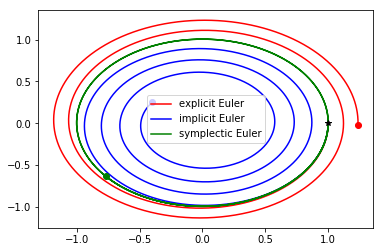

In [11]:
# plot the solutions
from matplotlib import pyplot

# form arrays from lists for convenient plotting
p_explicit_array   = array(p_Euler_explicit)    
p_implicit_array   = array(p_Euler_implicit)    
p_symplectic_array = array(p_Euler_symplectic)    
q_explicit_array   = array(q_Euler_explicit)    
q_implicit_array   = array(q_Euler_implicit)    
q_symplectic_array = array(q_Euler_symplectic)    

# select the solution coordinates q_1 and q_2
q1_explicit = q_explicit_array[:,0]
q2_explicit = q_explicit_array[:,1]
q1_implicit = q_implicit_array[:,0]
q2_implicit = q_implicit_array[:,1]
q1_symplectic = q_symplectic_array[:,0]
q2_symplectic = q_symplectic_array[:,1]

# plot the solutions
pyplot.plot(q1_explicit, q2_explicit, color='red')
pyplot.plot(q1_implicit, q2_implicit, color='blue')
pyplot.plot(q1_symplectic, q2_symplectic, color='green')

# plot initial point as star
pyplot.plot(q1_explicit[0],q2_explicit[0],'*', color='black') 

# plot final point as circle
pyplot.plot(q1_explicit[-1],q2_explicit[-1],'o', color='red') 
pyplot.plot(q1_implicit[-1],q2_implicit[-1],'o', color='blue') 
pyplot.plot(q1_symplectic[-1],q2_symplectic[-1],'o', color='green') 

# add legend
pyplot.legend(["explicit Euler","implicit Euler","symplectic Euler"])

pyplot.show()

### Task 1

What happens if you decrease/increase the stepsize $\tau$?

### Task 2

Implement the <b><font color='red'>Leapfrog method (Störmer/Verlet method)</font></b> for Hamiltonian systems with a Hamiltonian $H(p,q)$ satisfying $H_p(p,q) = \partial_p H(p,q) = p$ and $H_q(p,q) = \partial_q H(p,q) = -g(q)$.

\begin{align*}
  p_{n+1/2} &= p_n + \frac{\tau}{2} g(q_n)\\
  q_{n+1} &= q_n + \tau p_{n+1/2}\\
  p_{n+1} &= p_{n+1/2} + \frac{\tau}{2} g(q_{n+1})
\end{align*}

Hint: Modify the symplectic Euler step.

### Task 3

Test your implementation and plot your results for $g(q)$ from the movement of a satellite example, i.e.
\begin{align}
  g(q) =
  \begin{bmatrix}
    -q[1](q[1]^2+q[2]^2)^{-\frac{3}{2}} \\
    -q[2](q[1]^2+q[2]^2)^{-\frac{3}{2}} 
  \end{bmatrix}
\end{align}

### Task 4

Compare the results with the results of the symplectic Euler method for $\tau=0.1$.